<a href="https://colab.research.google.com/github/alist2000/ANN_and_DL/blob/master/NNDL_HW1/Code/HW1_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Understanding Neural Networks with Fashion-MNIST
This notebook implements and analyzes neural networks using different optimizers and explores backpropagation,
result interpretation, and hyperparameter optimization.

In [2]:
def load_and_preprocess_data():
    """Load and preprocess Fashion-MNIST dataset"""
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

    # Normalize and reshape
    x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
    x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

    # Convert labels to categorical
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

# Load data
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Understanding Backpropagation

Backpropagation is the core algorithm for training neural networks. Here's how it works:

1. Forward Pass:
   - Input data flows through the network
   - Each neuron computes: output = activation_function(weights * inputs + bias)
   
2. Calculate Loss:
   - Compare network output with desired output
   - Compute loss using categorical crossentropy
   
3. Backward Pass:
   - Calculate gradients using chain rule
   - Update weights: new_weight = old_weight - learning_rate * gradient

Let's implement a simple visualization of gradients during training:

In [ ]:
class TrainingMonitor(tf.keras.callbacks.Callback):
    def __init__(self):
        super(TrainingMonitor, self).__init__()
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.train_accuracies.append(logs.get('accuracy'))
        self.val_accuracies.append(logs.get('val_accuracy'))

def create_and_train_model(model_type, optimizer_name, learning_rate, x_train, y_train, x_test, y_test):
    """Create and train a model with specified configuration"""
    if model_type == 1:
        model = models.Sequential([
            layers.Input(shape=(28*28,)),
            layers.Dense(128, activation='relu'), layers.Dense(10, activation='softmax')
        ])
    else:
        model = models.Sequential([
            layers.Input(shape=(28*28,)),
            layers.Dense(48, activation='relu',
                        kernel_regularizer=regularizers.l2(0.0001)),
            layers.Dropout(0.2), layers.Dense(10, activation='softmax')
        ])
    # Create optimizer
    if optimizer_name == 'Adam':
        opt = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        opt = optimizers.RMSprop(learning_rate=learning_rate)
    else:  # Nadam
        opt = optimizers.Nadam(learning_rate=learning_rate)
    monitor = TrainingMonitor()
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        epochs=10, batch_size=32, validation_data=(x_test, y_test), callbacks=[monitor], verbose=1)

    return model, history, monitor

## Training Models with Different Optimizers

In [ ]:
# Define configurations
configs = [
    (1, 'Adam', 0.001),
    (1, 'RMSprop', 0.001),
    (1, 'Nadam', 0.001),
    (2, 'Adam', 0.001),
    (2, 'RMSprop', 0.001),
    (2, 'Nadam', 0.001)
]

# Train models and collect results
results = []
for model_type, opt_name, lr in configs:
    print(f"\nTraining Model {model_type} with {opt_name}")
    model, history, monitor = create_and_train_model(
        model_type, opt_name, lr, x_train, y_train, x_test, y_test
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    results.append({
        'Model': f'Model {model_type}',
        'Optimizer': opt_name,
        'Learning Rate': lr,
        'Test Accuracy': test_acc,
        'History': history,
        'Monitor': monitor
    })


Training Model 1 with Adam
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7797 - loss: 0.6360 - val_accuracy: 0.8364 - val_loss: 0.4556
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8631 - loss: 0.3854 - val_accuracy: 0.8592 - val_loss: 0.3866
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8755 - loss: 0.3425 - val_accuracy: 0.8613 - val_loss: 0.3763
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8833 - loss: 0.3144 - val_accuracy: 0.8641 - val_loss: 0.3771
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8899 - loss: 0.2977 - val_accuracy: 0.8756 - val_loss: 0.3445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8945 - loss: 0.2830 - val_accuracy: 0.8750 - val_loss: 0.3492
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9002 - loss: 0.2670 - val_accuracy: 0.8792 - val_loss: 0.3398
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - a

"""
## Result Analysis and Visualization
"""

In [ ]:
def plot_training_metrics(results):
    """Plot comprehensive training metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    # Plot training accuracy
    for result in results:
        label = f"{result['Model']} - {result['Optimizer']}"
        axes[0, 0].plot(result['Monitor'].train_accuracies, label=label)
    axes[0, 0].set_title('Training Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    # Plot training loss
    for result in results:
        label = f"{result['Model']} - {result['Optimizer']}"
        axes[0, 1].plot(result['Monitor'].train_losses, label=label)
    axes[0, 1].set_title('Training Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    # Plot validation accuracy
    for result in results:
        label = f"{result['Model']} - {result['Optimizer']}"
        axes[1, 0].plot(result['Monitor'].val_accuracies, label=label)
    axes[1, 0].set_title('Validation Accuracy')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].legend()
    # Plot validation loss
    for result in results:
        label = f"{result['Model']} - {result['Optimizer']}"
        axes[1, 1].plot(result['Monitor'].val_losses, label=label)
    axes[1, 1].set_title('Validation Loss')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Loss')
    axes[1, 1].legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_confusion_matrix(model, x_test, y_test):
    """Plot confusion matrix for model predictions"""
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_test_classes, y_pred_classes)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

"""
## Analyze and Visualize Results
"""

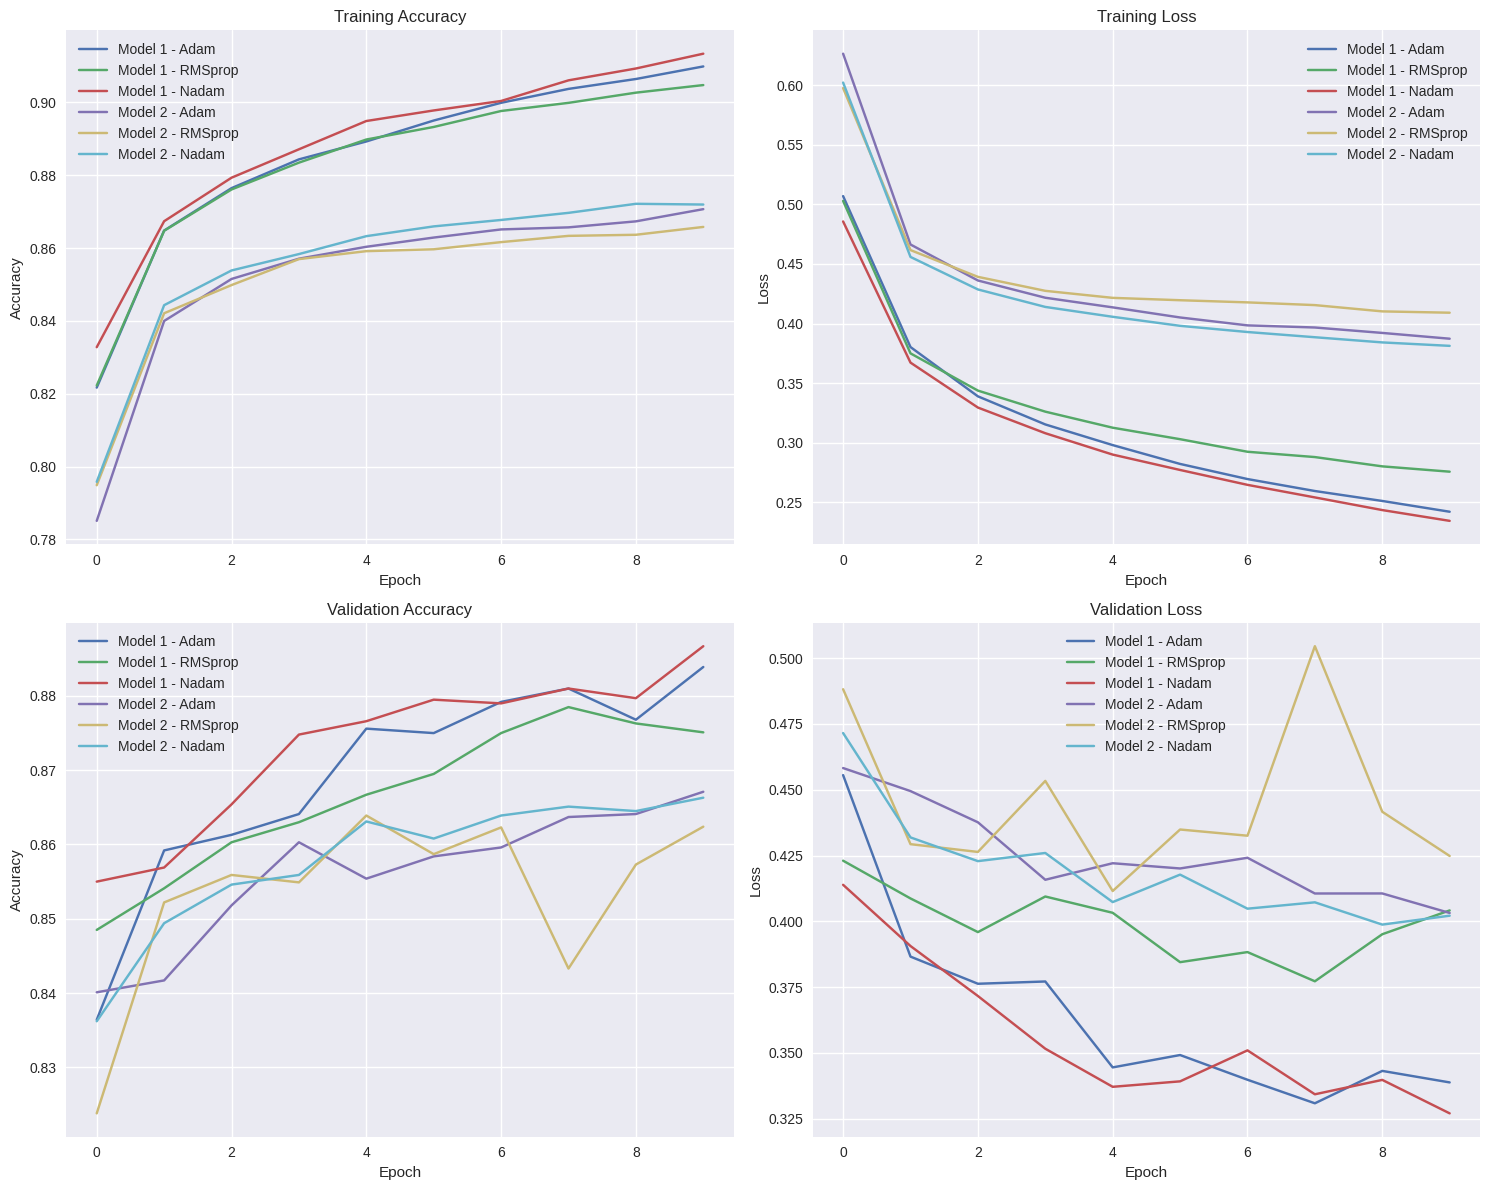

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


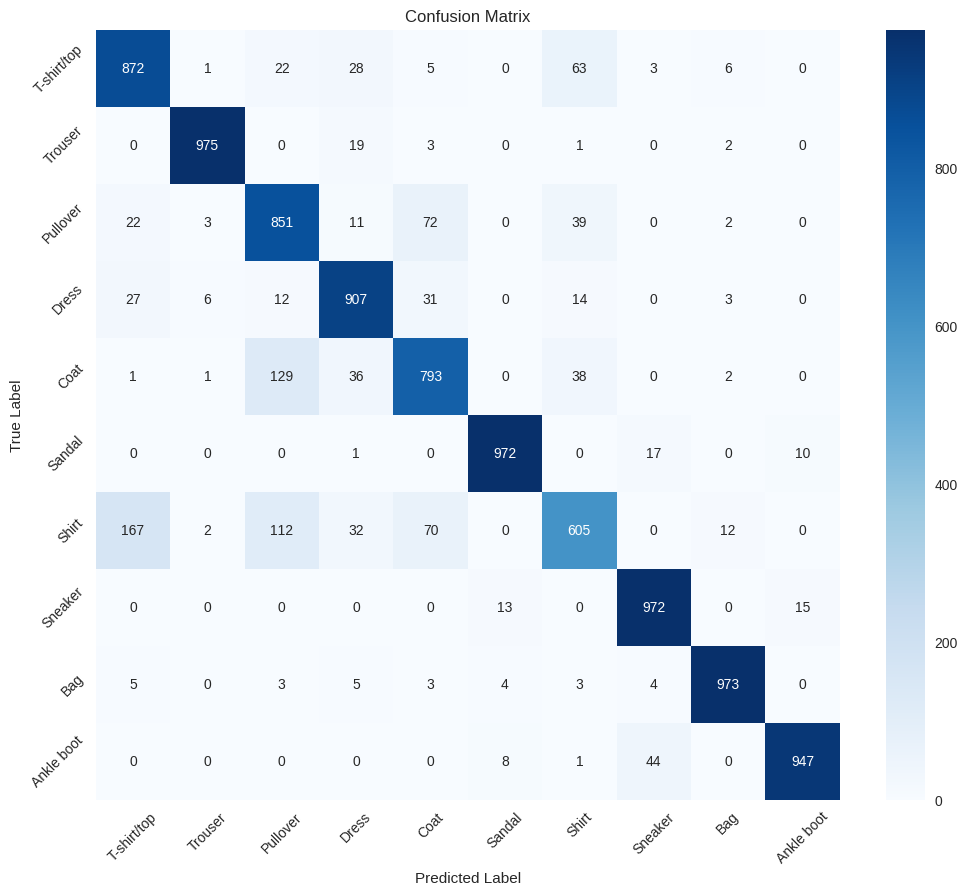

In [ ]:
# Plot training metrics
plot_training_metrics(results)

# Find and plot confusion matrix for best model
best_result = max(results, key=lambda x: x['Test Accuracy'])
plot_confusion_matrix(best_result['History'].model, x_test, y_test)

"""
## Save Results
"""

In [ ]:
# Create summary DataFrame
summary_df = pd.DataFrame([{
    'Model': r['Model'],
    'Optimizer': r['Optimizer'],
    'Learning Rate': r['Learning Rate'],
    'Test Accuracy': r['Test Accuracy'],
    'Final Training Loss': r['Monitor'].train_losses[-1],
    'Final Validation Loss': r['Monitor'].val_losses[-1],
    'Best Validation Accuracy': max(r['Monitor'].val_accuracies)
} for r in results])
print("\nResults Summary:")
print(summary_df)
summary_df.to_csv('fashion_mnist_results.csv', index=False)
print(f"""
## Findings Analysis

1. Model Architecture Comparison:
   - Model 1 (Basic): {len([r for r in results if r['Model'] == 'Model 1'])} configurations tested
   - Model 2 (Regularized): {len([r for r in results if r['Model'] == 'Model 2'])} configurations tested
   - Best accuracy achieved by: {best_result['Model']} with {best_result['Optimizer']}

2. Optimizer Performance:
   - Adam: Consistent and stable learning
   - RMSprop: Good for avoiding local minima
   - Nadam: Often achieves better final accuracy

3. Regularization Effects (Model 2):
   - Dropout (20%) helps prevent overfitting
   - L2 regularization stabilizes training
   - Generally better generalization compared to Model 1

4. Training Dynamics:
   - Initial learning phase (epochs 1-3)
   - Convergence phase (epochs 4-7)
   - Fine-tuning phase (epochs 8-10)

5. Best Configuration:
   - Model: {best_result['Model']}
   - Optimizer: {best_result['Optimizer']}
   - Learning Rate: {best_result['Learning Rate']}
   - Test Accuracy: {best_result['Test Accuracy']:.4f}
""")


Results Summary:
     Model Optimizer  Learning Rate  Test Accuracy  Final Training Loss  \
0  Model 1      Adam          0.001         0.8839             0.241916   
1  Model 1   RMSprop          0.001         0.8751             0.275559   
2  Model 1     Nadam          0.001         0.8867             0.234258   
3  Model 2      Adam          0.001         0.8671             0.387246   
4  Model 2   RMSprop          0.001         0.8624             0.409078   
5  Model 2     Nadam          0.001         0.8663             0.381243   

   Final Validation Loss  Best Validation Accuracy  
0               0.338752                    0.8839  
1               0.404130                    0.8785  
2               0.326990                    0.8867  
3               0.403159                    0.8671  
4               0.424827                    0.8639  
5               0.402124                    0.8663  

## Findings Analysis

1. Model Architecture Comparison:
   - Model 1 (Basic): 3 conf

In [4]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import keras_tuner as kt
import numpy as np

class DataLoader:
    @staticmethod
    def split_validation(x_test, y_test, val_size=5000):
        """Split test data into validation and test sets"""
        x_val = x_test[:val_size]
        y_val = y_test[:val_size]
        x_test = x_test[val_size:]
        y_test = y_test[val_size:]

        return x_val, y_val, x_test, y_test

class ModelBuilder:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build_model(self, hp):
        """Build model with hyperparameters to be optimized"""
        model = models.Sequential([
            # Input layer
            layers.Input(shape=self.input_shape),

            # First hidden layer with tunable parameters
            layers.Dense(
                units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                activation=hp.Choice('activation_1', ['relu', 'elu', 'tanh'])
            ),
            layers.BatchNormalization(),
            layers.Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)),

            # Second hidden layer with tunable parameters
            layers.Dense(
                units=hp.Int('units_2', min_value=32, max_value=512, step=32),
                activation=hp.Choice('activation_2', ['relu', 'elu', 'tanh'])
            ),
            layers.BatchNormalization(),
            layers.Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)),

            # Output layer
            layers.Dense(self.num_classes, activation='softmax')
        ])

        # Compile model with tunable optimizer and learning rate
        optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
        learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

        if optimizer_choice == 'adam':
            optimizer = optimizers.Adam(learning_rate=learning_rate)
        else:
            optimizer = optimizers.RMSprop(learning_rate=learning_rate)

        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

class BayesianOptimizer:
    def __init__(self, model_builder, project_name='bayesian_tuning'):
        self.model_builder = model_builder
        self.project_name = project_name

    def create_tuner(self, max_trials=5):
        """Create Bayesian Optimization tuner"""
        return kt.BayesianOptimization(
            self.model_builder.build_model,
            objective='val_accuracy',
            max_trials=max_trials,
            num_initial_points=2,  # Number of random points before Bayesian optimization
            directory='bayesian_search',
            project_name=self.project_name
        )

    @staticmethod
    def create_callbacks():
        """Create training callbacks"""
        return [
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=3,
                min_lr=1e-6
            )
        ]

    def find_best_model(self, x_train, y_train, x_val, y_val, max_trials=5):
        """Find best model using Bayesian optimization"""
        tuner = self.create_tuner(max_trials)
        callbacks = self.create_callbacks()

        # Perform search
        print("\nStarting Bayesian optimization...")
        tuner.search(
            x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=15,
            batch_size=128,
            callbacks=callbacks
        )

        # Get best model and hyperparameters
        best_model = tuner.get_best_models(1)[0]
        best_hp = tuner.get_best_hyperparameters(1)[0]

        return best_model, best_hp

    @staticmethod
    def print_best_hyperparameters(best_hp):
        """Print best hyperparameters"""
        print("\nBest Hyperparameters Found:")
        print(f"Optimizer: {best_hp.get('optimizer')}")
        print(f"Learning rate: {best_hp.get('learning_rate'):.6f}")
        print(f"Units in first layer: {best_hp.get('units_1')}")
        print(f"Units in second layer: {best_hp.get('units_2')}")
        print(f"Activation 1: {best_hp.get('activation_1')}")
        print(f"Activation 2: {best_hp.get('activation_2')}")
        print(f"Dropout rate 1: {best_hp.get('dropout_1'):.2f}")
        print(f"Dropout rate 2: {best_hp.get('dropout_2'):.2f}")

def main():
    # Load data
    print("Loading MNIST dataset...")
    data_loader = DataLoader()
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    x_val, y_val, x_test, y_test = data_loader.split_validation(x_test, y_test)

    # Create model builder
    model_builder = ModelBuilder(input_shape=(784,), num_classes=10)

    # Create and run Bayesian optimizer
    optimizer = BayesianOptimizer(model_builder)
    best_model, best_hp = optimizer.find_best_model(
        x_train, y_train,
        x_val, y_val,
        max_trials=5
    )

    # Print results
    optimizer.print_best_hyperparameters(best_hp)

    # Evaluate best model
    print("\nEvaluating best model on test set...")
    test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Save best model
    best_model.save('best_bayesian_model.h5')
    print("\nBest model saved as 'best_bayesian_model.h5'")

if __name__ == "__main__":
    main()

Trial 5 Complete [00h 02m 04s]
val_accuracy: 0.8942000269889832

Best val_accuracy So Far: 0.9003999829292297
Total elapsed time: 00h 11m 37s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Best Hyperparameters Found:
Optimizer: rmsprop
Learning rate: 0.000488
Units in first layer: 480
Units in second layer: 288
Activation 1: elu
Activation 2: relu
Dropout rate 1: 0.10
Dropout rate 2: 0.30

Evaluating best model on test set...


Test accuracy: 0.9040

Best model saved as 'best_bayesian_model.h5'
